# Predict the true death rate per country and examine the relationship of the death rate with the age of the victims.

# Load and take a look at the data

In [1]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
dspop=pd.read_csv('population_structure_by_age_per_contry.csv')
dsworld=pd.read_csv('worldometer_snapshots_April18_to_May18.csv')

In [3]:
dspop.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [4]:
dsworld.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [5]:
dspop.shape

(213, 4)

In [6]:
dsworld.shape

(6603, 9)

In [7]:
dspop.dtypes

Country                      object
Fraction age 0-14 years     float64
Fraction age 15-64 years    float64
Fraction age 65+ years      float64
dtype: object

In [8]:
dsworld.dtypes

Date                    object
Country                 object
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
dtype: object

# Check and treat null values

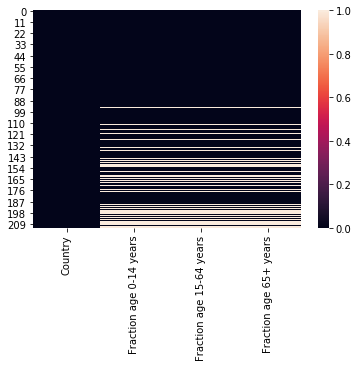

In [9]:
sns.heatmap(dspop.isnull())

# Combine relevant rows and columns of the population dataset with the world dataset to analyse the death-rate between countries on the basis of their population age dispersions.

In [10]:
# Check tail to find last date
dsworld.tail()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0
6602,2020-05-18,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0


In [11]:
# filter rows to only show the entries for the last date per country
Latest_data=dsworld['Date']=='2020-05-18'
filt_dsworld=dsworld[Latest_data]
filt_dsworld.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
6390,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0
6391,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0
6392,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0
6393,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0
6394,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN


In [12]:
merge_ds=pd.merge(dspop,filt_dsworld, on='Country', how= 'left')

In [13]:
merge_ds.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Date,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,USA,0.189,0.657,0.154,2020-05-18,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0
1,Russia,0.176,0.682,0.142,2020-05-18,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0
2,Spain,0.147,0.659,0.194,2020-05-18,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0
3,Brazil,0.217,0.697,0.086,2020-05-18,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0
4,UK,0.177,0.638,0.185,2020-05-18,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN


In [14]:
merge_ds.columns

Index(['Country', 'Fraction age 0-14 years', 'Fraction age 15-64 years',
       'Fraction age 65+ years', 'Date', 'Population', 'Total Tests',
       'Total Cases', 'Total Deaths', 'Total Recovered', 'Serious or Critical',
       'Active Cases'],
      dtype='object')

In [15]:
# Drop unnecessary columns
mds=merge_ds.drop(columns=['Date', 'Total Tests','Total Recovered', 'Serious or Critical',
       'Active Cases'])

In [16]:
mds.isnull().sum()

Country                      0
Fraction age 0-14 years     37
Fraction age 15-64 years    37
Fraction age 65+ years      37
Population                   0
Total Cases                  0
Total Deaths                35
dtype: int64

In [17]:
# Remove rows with null values
mds = mds.dropna()

In [18]:
mds.isnull().sum()

Country                     0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
Population                  0
Total Cases                 0
Total Deaths                0
dtype: int64

In [19]:
mds.shape

(158, 7)

In [20]:
# Add a column with the death rate in percentage
death_rate = mds['Total Deaths']/ mds['Total Cases']*100
mds['Death Rate %'] = death_rate

In [21]:
mds.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Population,Total Cases,Total Deaths,Death Rate %
0,USA,0.189,0.657,0.154,330774664,1550294.0,91981.0,5.933133
1,Russia,0.176,0.682,0.142,145927292,290678.0,2722.0,0.936431
2,Spain,0.147,0.659,0.194,46752703,278188.0,27709.0,9.960530
3,Brazil,0.217,0.697,0.086,212380932,255368.0,16853.0,6.599496
4,UK,0.177,0.638,0.185,67844241,246406.0,34796.0,14.121409


# Check and fill null values world dataset

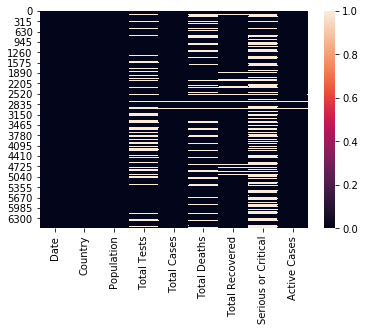

In [22]:
sns.heatmap(dsworld.isnull())

In [23]:
dsworld.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [24]:
dsworld.columns

Index(['Date', 'Country', 'Population', 'Total Tests', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Serious or Critical',
       'Active Cases'],
      dtype='object')

In [25]:
# Replace nan values with 0 in Total_Deaths column. 
# Checked the csv file to see that that is the most likely value for it.
dsworld['Total Deaths'].replace( np.nan, 0, inplace=True)

In [26]:
# Check to see if Total_Deaths has been filled
dsworld.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths              0
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [27]:
# Remove irrelevant columns
dsworld=dsworld.drop(columns=['Total Tests','Total Recovered', 'Serious or Critical'])

In [28]:
dsworld.isnull().sum()

Date             0
Country          0
Population       0
Total Cases     49
Total Deaths     0
Active Cases    59
dtype: int64

In [29]:
# Remove rows with null values
dsworld = dsworld.dropna()

In [30]:
dsworld.isnull().sum()

Date            0
Country         0
Population      0
Total Cases     0
Total Deaths    0
Active Cases    0
dtype: int64

In [31]:
dsworld.shape

(6544, 6)

In [32]:
# Add a column with the death rate in percentage
death_rate = dsworld['Total Deaths']/ dsworld['Total Cases']*100
dsworld['Death Rate %'] = death_rate

In [33]:
dsworld.head()

,Date,Country,Population,Total Cases,Total Deaths,Active Cases,Death Rate %
0,2020-04-18,USA,330774664,738792.0,39014.0,631509.0,5.280783
1,2020-04-18,Russia,145927292,36793.0,313.0,33423.0,0.850705
2,2020-04-18,Spain,46752703,194416.0,20043.0,99576.0,10.309337
3,2020-04-18,Brazil,212380932,36722.0,2361.0,20335.0,6.429388
4,2020-04-18,UK,67844241,114217.0,15464.0,98409.0,13.539140


# Check correlation

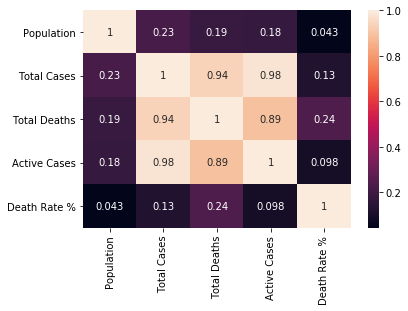

In [34]:
dscor=dsworld.corr()
sns.heatmap(dscor, annot=True)

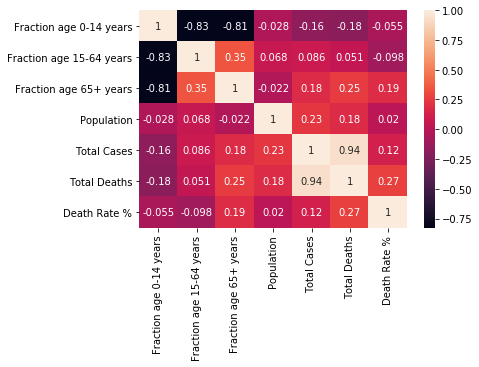

In [35]:
dscor=mds.corr()
sns.heatmap(dscor, annot=True)

The Fraction of ages above 65 and the amount of total deaths have the same correlation to the death rate indicating that that age bracketsuffered more deaths.

# Summary statistics

In [36]:
dsworld.describe()

,Population,Total Cases,Total Deaths,Active Cases,Death Rate %
count,6.544000e+03,6.544000e+03,6544.000000,6.544000e+03,6544.000000
mean,3.661499e+07,1.673866e+04,1130.996027,9.964142e+03,3.866496
std,1.417562e+08,8.846423e+04,5971.416593,6.541025e+04,4.253781
min,8.010000e+02,1.000000e+00,0.000000,0.000000e+00,0.000000
25%,7.861080e+05,7.900000e+01,1.000000,2.600000e+01,0.606551
50%,6.859926e+06,6.110000e+02,11.000000,2.720000e+02,2.736810
75%,2.629474e+07,4.784000e+03,110.000000,2.041000e+03,5.694881
max,1.439324e+09,1.550294e+06,91981.000000,1.101930e+06,33.333333


In [37]:
mds.describe()

,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Population,Total Cases,Total Deaths,Death Rate %
count,158.000000,158.000000,158.000000,1.580000e+02,1.580000e+02,158.000000,158.000000
mean,0.269027,0.638691,0.092187,4.748897e+07,3.088065e+04,2023.392405,4.335406
std,0.106837,0.066093,0.064151,1.626938e+08,1.324210e+05,8848.498444,4.183338
min,0.115000,0.472000,0.011000,9.783300e+04,1.100000e+01,1.000000,0.044158
25%,0.173250,0.600250,0.034000,4.273742e+06,5.392500e+02,10.000000,1.406813
50%,0.249500,0.650500,0.069000,1.077079e+07,2.173500e+03,51.500000,3.497237
75%,0.358000,0.675750,0.148000,3.328644e+07,1.495925e+04,315.000000,5.806683
max,0.502000,0.850000,0.270000,1.439324e+09,1.550294e+06,91981.000000,32.000000


# Data visualizations for the dsworld dataset

In [38]:
dsworld.columns

Index(['Date', 'Country', 'Population', 'Total Cases', 'Total Deaths',
       'Active Cases', 'Death Rate %'],
      dtype='object')

In [39]:
dsworld.groupby(['Country'], sort=False)['Death Rate %'].mean()

Country
USA                       5.770303
Russia                    0.920224
Spain                    10.179645
Brazil                    6.770350
UK                       14.355098
                           ...    
Anguilla                  0.000000
Saint Pierre Miquelon     0.000000
Tajikistan                2.288695
Comoros                   6.758373
Lesotho                   0.000000
Name: Death Rate %, Length: 213, dtype: float64

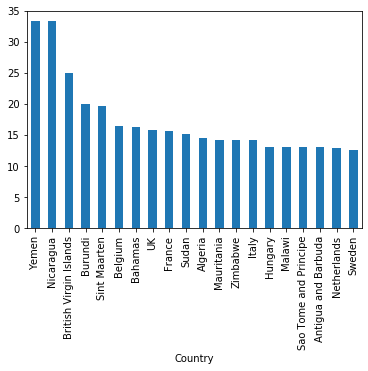

In [40]:
# Show the mean Death Rate per country top 20
dsworld.groupby('Country')['Death Rate %'].max().sort_values(ascending=False).head(20).plot.bar()

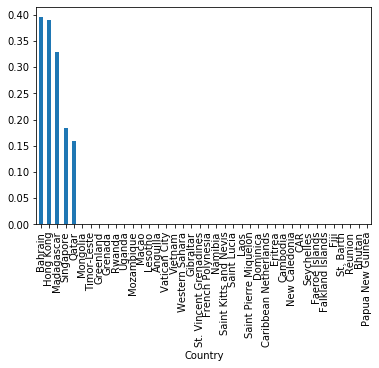

In [41]:
# Show the mean Death Rate per country bottom 40
dsworld.groupby('Country')['Death Rate %'].max().sort_values(ascending=False).tail(40).plot.bar()

There are 35 countries with a 0% death rate.

# Data visualizations for the mds dataset

In [42]:
mds.columns

Index(['Country', 'Fraction age 0-14 years', 'Fraction age 15-64 years',
       'Fraction age 65+ years', 'Population', 'Total Cases', 'Total Deaths',
       'Death Rate %'],
      dtype='object')

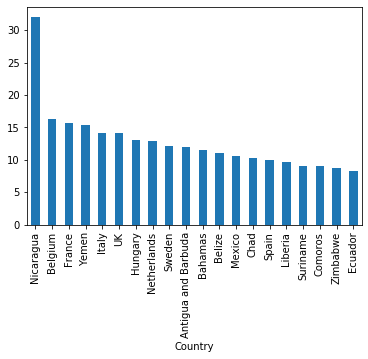

In [82]:
# Show the mean Death Rate per country top 20
mds.groupby('Country')['Death Rate %'].mean().sort_values(ascending=False).head(20).plot.bar()

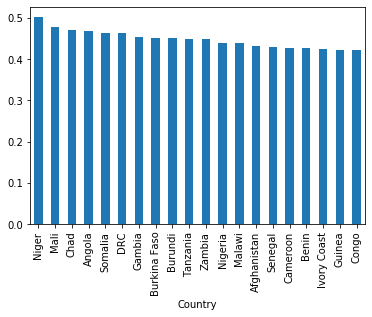

In [44]:
# Show the fraction of the population below 14 top 20
mds.groupby('Country')['Fraction age 0-14 years'].max().sort_values(ascending=False).head(20).plot.bar()

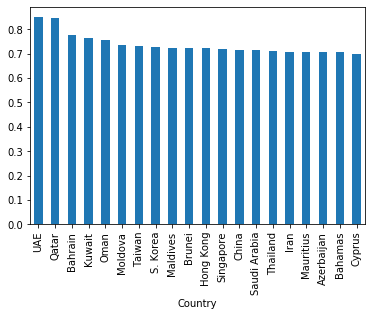

In [45]:
# Show the fraction of the population between 25 and 65 top 20
mds.groupby('Country')['Fraction age 15-64 years'].max().sort_values(ascending=False).head(20).plot.bar()

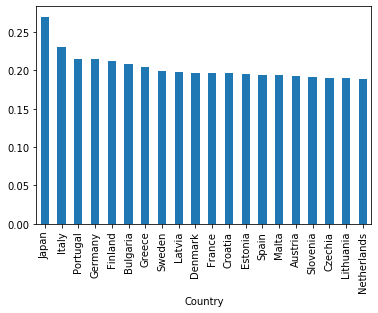

In [46]:
# Show the fraction of the population above 65 top 20
mds.groupby('Country')['Fraction age 65+ years'].max().sort_values(ascending=False).head(20).plot.bar()

In [84]:
mds.groupby(['Country','Fraction age 0-14 years','Fraction age 15-64 years','Fraction age 65+ years'])['Death Rate %'].sum().sort_values(ascending=False)

Country     Fraction age 0-14 years  Fraction age 15-64 years  Fraction age 65+ years
Nicaragua   0.290                    0.655                     0.054                     32.000000
Belgium     0.171                    0.643                     0.186                     16.342987
France      0.181                    0.622                     0.197                     15.694698
Yemen       0.399                    0.572                     0.029                     15.384615
Italy       0.135                    0.635                     0.230                     14.169537
                                                                                           ...    
Maldives    0.234                    0.725                     0.041                      0.361664
Madagascar  0.410                    0.561                     0.029                      0.310559
Bahrain     0.197                    0.779                     0.024                      0.167038
Singapore   0.150      

From the above groupby it seems that countries with a smaller percentage of people over 65 generally have a lower death rate.  There are outliers though, like Yemen and Nicaragua which indicates that there are other factors at play in those countries.  Yemen for instance has experienced a war for the last couple of years.

# Encode categorical columns to numeric values

In [47]:
eds=dsworld

In [48]:
eds.columns

Index(['Date', 'Country', 'Population', 'Total Cases', 'Total Deaths',
       'Active Cases', 'Death Rate %'],
      dtype='object')

In [49]:
eds.dtypes

Date             object
Country          object
Population        int64
Total Cases     float64
Total Deaths    float64
Active Cases    float64
Death Rate %    float64
dtype: object

In [50]:
# Change categorical data to numerical data for 2 categoriacl columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Date','Country']
for col in cols:
    eds[col] = le.fit_transform(eds[col])

In [51]:
eds.head()

,Date,Country,Population,Total Cases,Total Deaths,Active Cases,Death Rate %
0,0,201,330774664,738792.0,39014.0,631509.0,5.280783
1,0,158,145927292,36793.0,313.0,33423.0,0.850705
2,0,180,46752703,194416.0,20043.0,99576.0,10.309337
3,0,26,212380932,36722.0,2361.0,20335.0,6.429388
4,0,200,67844241,114217.0,15464.0,98409.0,13.539140


# Check correlation after encoding

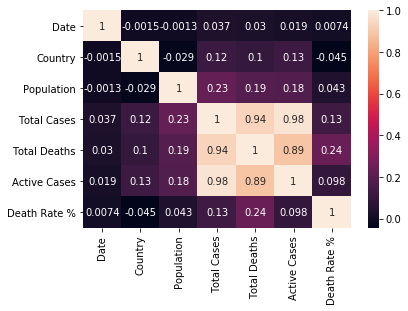

In [52]:
dscor=eds.corr()
sns.heatmap(dscor, annot=True)

# Drop irrelevant columns

In [53]:
eds.columns

Index(['Date', 'Country', 'Population', 'Total Cases', 'Total Deaths',
       'Active Cases', 'Death Rate %'],
      dtype='object')

# Drop irrelevant (poorly correlated) columns - dataset renamed to nds (new dataset)
nds=ds.drop(columns=[])

In [54]:
# Keeping all columns
nds=eds

# Find and remove outliers

In [55]:
nds.shape

(6544, 7)

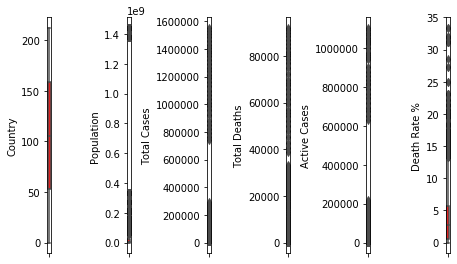

In [56]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=7
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

In [57]:
# Remove outliers - dataset renamed to cds (clean dataset)
from scipy import stats
from scipy.stats import zscore

z_score=abs(zscore(nds))
print(nds.shape)
cds=nds.loc[(z_score<3).all(axis=1)]
print(cds.shape)

(6544, 7)
(6250, 7)


# Check and adjust skewness

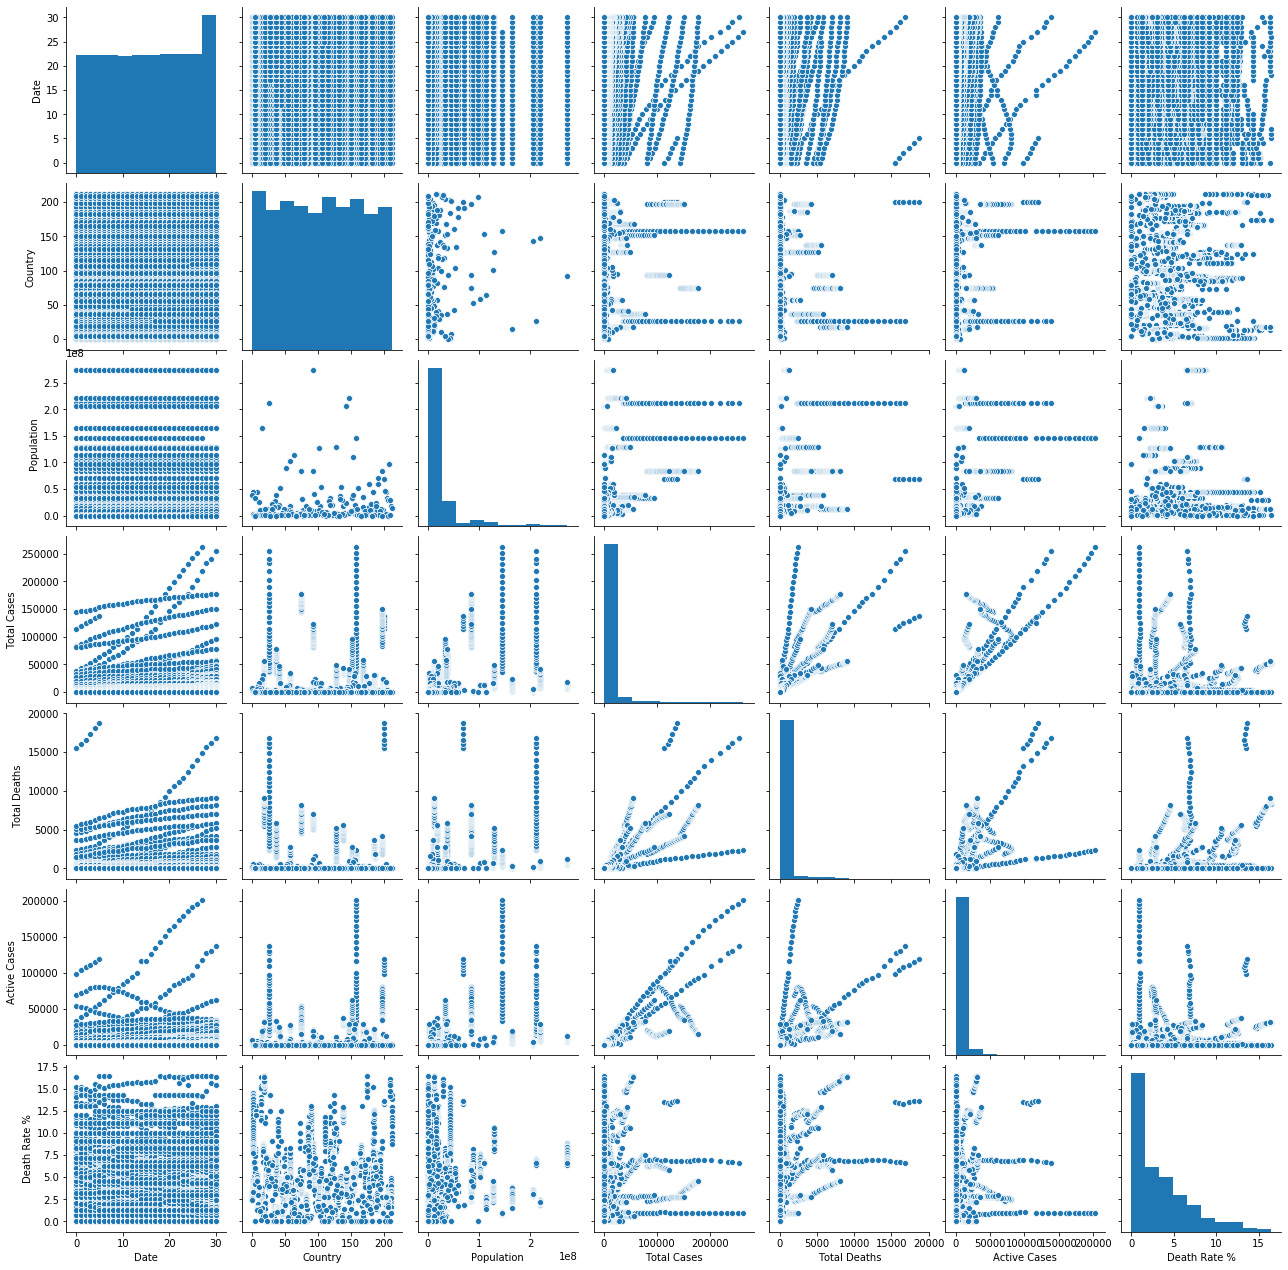

In [58]:
# Checking pairplots
sns.pairplot(cds)
plt.show()

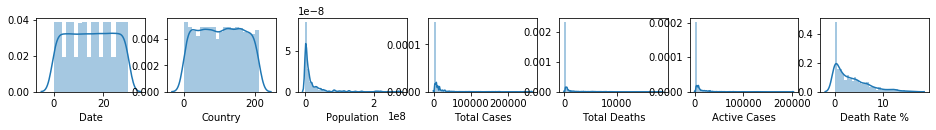

In [59]:
# Show distribution plots for all columns
collist=cds.columns.values
ncol=7
nrows=10

plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(cds[collist[i]])

In [60]:
# Show skewness (less than 0.55 is ok)
cds.skew()

Date           -0.005323
Country         0.006235
Population      3.456798
Total Cases     5.795627
Total Deaths    6.723200
Active Cases    7.779683
Death Rate %    1.208896
dtype: float64

In [61]:
#Treat skewness using log
for col in cds.columns:
    if cds.skew().loc[col]>0.55:
        cds[col]=np.log1p(cds[col])

In [62]:
cds.skew()

Date           -0.005323
Country         0.006235
Population     -0.788210
Total Cases     0.050727
Total Deaths    0.611373
Active Cases   -0.055222
Death Rate %   -0.024661
dtype: float64

# Split data into x and y

In [63]:
cds.columns

Index(['Date', 'Country', 'Population', 'Total Cases', 'Total Deaths',
       'Active Cases', 'Death Rate %'],
      dtype='object')

In [64]:
# Lineup target and input values
x=cds.drop(columns=['Death Rate %'])
y=cds[['Death Rate %']]

# Train-Test split

In [65]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=55, test_size=0.20)

# Model

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.externals import joblib
from sklearn import linear_model

In [67]:
# Error calculation
max_r_score=0
for r_state in range(42,100):
    x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=r_state, test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("Max r2 score for",final_r_state,"is", max_r_score)

Max r2 score for 46 is 0.6245346484377245


In [68]:
# Crossvalidation
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring='r2').mean()

0.5828253110754216

In [69]:
# R2 score gives us a rondom state of 46
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state=46, test_size=0.20)
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [70]:
# R2 and Mean squared error statements
print('r score is: ',r2_score(y_test,y_pred))
print('RMSE is: ', np.sqrt(mean_squared_error(y_test, y_pred)))

r score is:  0.6245346484377245
RMSE is:  0.500838633821313


# Other regression models

In [71]:
# Loop for SVR types
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.38205943772427964
0.3065597120547368
0.3371916666133806


In [72]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
# Prepare a range of alpha values to test
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
# Create and fit a Ridge regression model to test each alpha
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x_train,y_train)

#Summarize the results of the grid search

print(grid.best_estimator_.alpha)

1


In [73]:
# Create and fit a Ridge regression model to test each alpha
model2=Lasso()
grid=GridSearchCV(estimator=model2,param_grid=alphavalue)
grid.fit(x_train,y_train)

#Summarize the results of the grid search

print(grid.best_estimator_.alpha)

0.0001


In [74]:
# x_train,x_test,y_train, y_test
# Try to minimize the coefficient variance

rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.5738708996693478

In [75]:
# Cross validation score for Ridge Regressor
cross_val_score(linear_model.Ridge(alpha=1),x,y,cv=10,scoring='r2').mean()

0.5828253635463372

In [89]:
# x_train,x_test,y_train, y_test
# Try to minimize the coefficient variance

las=Lasso(alpha=0.0001)
las.fit(x_train,y_train)
las.score(x_train,y_train)

0.5738709013185659

In [77]:
# Use Gradient Boosting technique with GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [78]:
# Use CrossValScore with Gradient Boosting to check r2 mean and standard deviation
gbr=GradientBoostingRegressor(learning_rate= 0.1, n_estimators=1000)
print('Mean r2 score for GradientBoosting Regression:', cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for GradientBoosting Regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for GradientBoosting Regression: 0.9947219837917247
Standard deviation in r2 score for GradientBoosting Regression: 0.005080569776001319


In [79]:
gbr=GradientBoostingRegressor(learning_rate= 0.1, n_estimators=1000)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

I choose the GradientBoostingRegressor model because it has the best score

Mean r2 score for GradientBoosting Regression: 99.5
Standard deviation in r2 score for GradientBoosting Regression: 0.5

# Save the model

In [80]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(gbr,'Death_rate_Countries.pkl')

['Death_rate_Countries.pkl']

In [81]:
# Load and use model to make a prediction
model=joblib.load('Death_rate_Countries.pkl')
model.predict(x_test)

array([ 2.36093672e+00,  7.79568544e-01, -1.45964595e-03, ...,
        1.29071878e+00,  6.48652526e-01,  6.64172532e-01])